In [1060]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

## 1.1

### 1.1.3

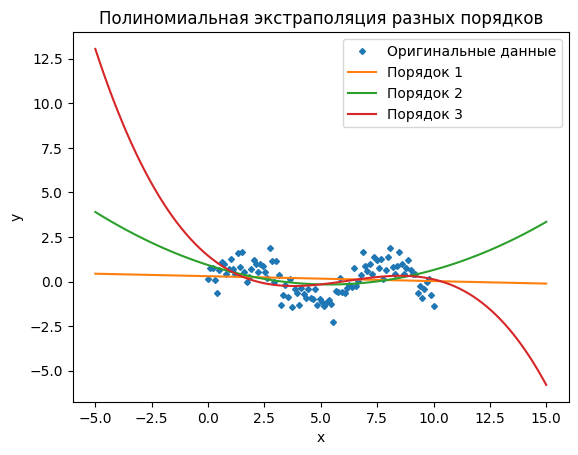

In [1061]:
x = np.linspace(0, 10, 100)
y = np.sin(x) + 0.5 * np.random.randn(100)

degrees = [1, 2, 3]

fig, ax = plt.subplots()

ax.plot(x, y, marker='D', markersize=3, linestyle='None', label='Оригинальные данные')

for degree in degrees:
    coeffs = np.polyfit(x, y, degree)
    poly = np.poly1d(coeffs)
    x_ext = np.linspace(-5, 15, 100)
    y_ext = poly(x_ext)
    ax.plot(x_ext, y_ext, label=f'Порядок {degree}')

ax.set_title('Полиномиальная экстраполяция разных порядков')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

plt.show()

### 1.1.5

In [1062]:
xdata = np.linspace(0, 5, 50)
beta = (0.25, 0.75)

In [1063]:
def f1(x, b0, b1):
    return b0 + b1*x

def f2(x, b0, b1, b2):
    return b0 + b1*x + b2*x**2

def f3(x, b0, b1):
    return b0 + b1*np.log(x)

def f4(x, b0, b1):
    return b0*x**b1

In [1064]:
def fit_and_plot(func, xdata, ydata, func_name):
    beta_opt, beta_cov = curve_fit(func, xdata, ydata)
    y_fit = func(xdata, *beta_opt)
    
    # Вычисление отклонений
    residuals = ydata - y_fit
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ydata - np.mean(ydata))**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    print(f"Функция {func_name}:")
    print(f"Оптимальные параметры: {beta_opt}")
    print(f"R-квадрат: {r_squared:.4f}")
    
    plt.plot(xdata, ydata, 'o', label='Данные')
    plt.plot(xdata, y_fit, label=func_name)
    plt.legend()
    plt.show()

In [1065]:
xdata = np.linspace(0.1, 10, 100)
beta = (0.15, 0.85)

Функция Линейная:
Оптимальные параметры: [0.17409819 0.8501626 ]
R-квадрат: 1.0000


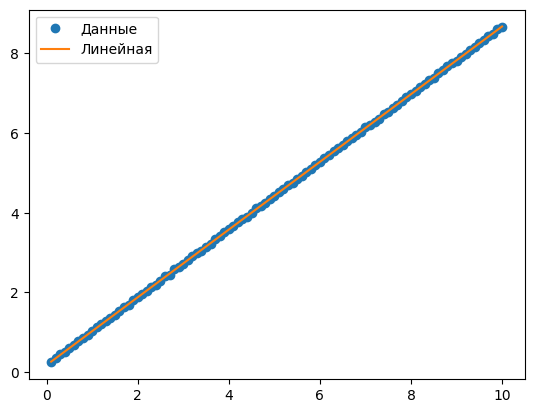

In [1066]:
ydata = f1(xdata, *beta) + 0.05*np.random.rand(len(xdata))
fit_and_plot(f1,xdata, ydata, "Линейная")

Функция Квадратичная:
Оптимальные параметры: [0.1556344  0.8482011  0.50002181]
R-квадрат: 1.0000


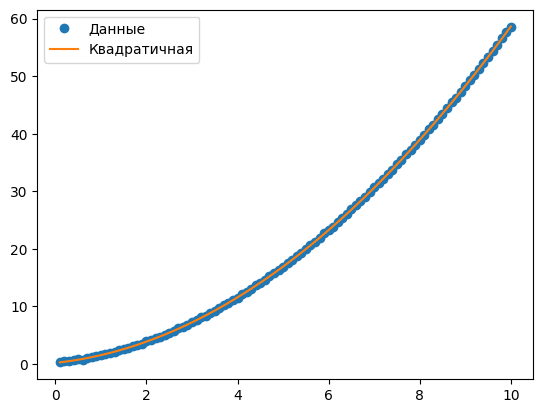

In [1067]:
ydata = f2(xdata, *beta, 0.5) + 0.05*np.random.randn(len(xdata))
fit_and_plot(f2, xdata, ydata, "Квадратичная")

Функция Экспоненциальная:
Оптимальные параметры: [0.16751529 0.83863737]
R-квадрат: 0.9963


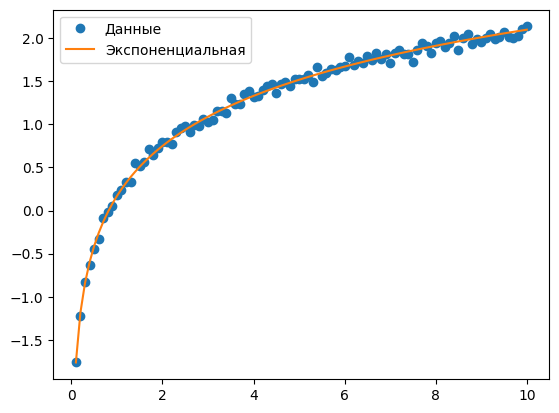

In [1068]:
ydata = f3(xdata, *beta) + 0.05*np.random.randn(len(xdata))
fit_and_plot(f3, xdata, ydata, "Экспоненциальная")

Функция Логарифмическая:
Оптимальные параметры: [0.15526579 0.82957266]
R-квадрат: 0.9730


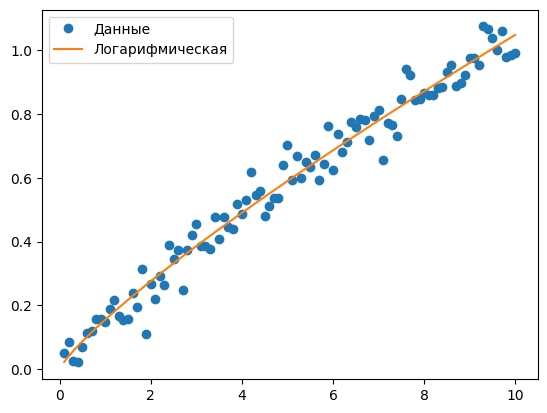

In [1069]:
ydata = f4(xdata, *beta) + 0.05*np.random.randn(len(xdata))
fit_and_plot(f4, xdata, ydata, "Логарифмическая")

Линейная функция:
- Изменение свободного члена (сдвига по оси Oy) сдвигает график вверх или вниз параллельно самой себе
- Изменение коэффициента при x (угла наклона) изменяет крутизну графика. При положительном коэффициенте график возрастает, при отрицательном – убывает

Квадратичная функция:
- Изменение свободного члена сдвигает параболу вверх или вниз
- Изменение коэффициента при x² определяет направление ветвей параболы (вверх или вниз)
- Изменение коэффициента при x сдвигает вершину параболы вдоль оси Ox

Экспоненциальная функция:
- Изменение основания степени определяет скорость роста или убывания функции
- Изменение показателя степени влияет на скорость изменения функции

Логарифмическая функция:
- Изменение основания логарифма изменяет скорость роста функции
- Добавление константы сдвигает график вверх или вниз

## 1.2

### 1.2.1

In [1070]:
df = pd.read_csv('https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [1071]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [1072]:
X = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary'].values.reshape(-1, 1)

In [1073]:
print(X.shape, y.shape)

(30, 1) (30, 1)


In [1074]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [1075]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1076]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)

0.9779208335417602

In [1077]:
y_pred = model.predict(X_test_scaled)

In [1078]:
df_results = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_results.describe()

,Actual,Predicted
count,8.000000,8.000000
mean,84406.250000,87485.823990
std,34056.938453,32032.579447
min,37731.000000,41056.257055
25%,56759.250000,64271.040522
50%,86324.500000,87016.838465
75%,113718.500000,116328.433753
max,122391.000000,123597.709384


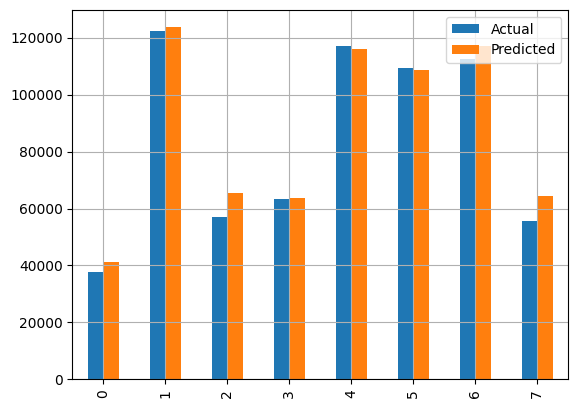

In [1079]:
df_results.plot(kind='bar')
plt.grid()
plt.show()


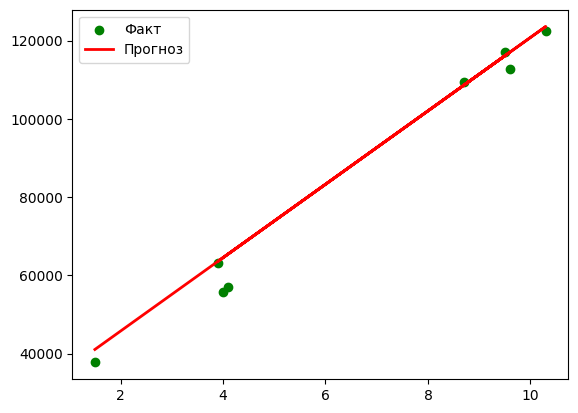

In [1080]:
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.legend(['Факт', 'Прогноз'])
plt.show()

## 1.3

### 1.3.2

In [1081]:
wine_quality_link = \
    'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'

In [1082]:
df = pd.read_csv(wine_quality_link)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [1083]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: >

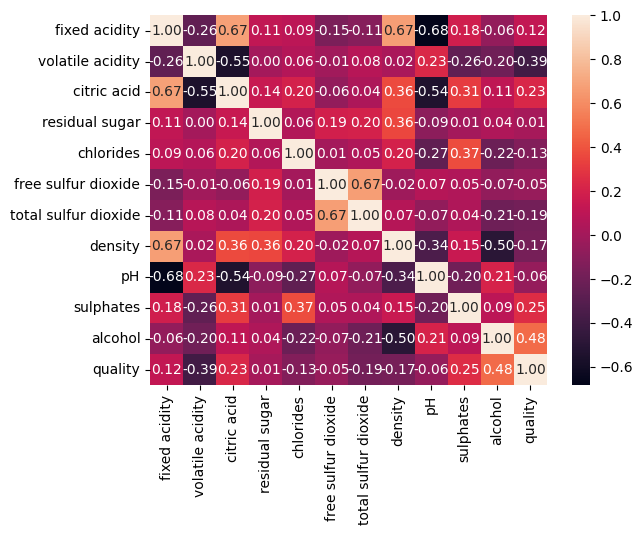

In [1084]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [1085]:
X = df.drop('quality', axis=1)
y = df['quality']

In [1086]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [1087]:
X_train_scaled, X_test_scaled, y_train, y_test = \
    train_test_split(X_scaled, y, test_size=0.18, random_state=0)

In [1088]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [1089]:
y_pred = model.predict(X_test_scaled)

In [1090]:
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [1091]:
mse = metrics.mean_squared_error(df_results.Actual, df_results.Predicted)
r2 = metrics.r2_score(df_results.Actual, df_results.Predicted)
print(f'MSE: {mse}')
print(f'R2: {r2}')

MSE: 0.3846779428112863
R2: 0.3508427643681852


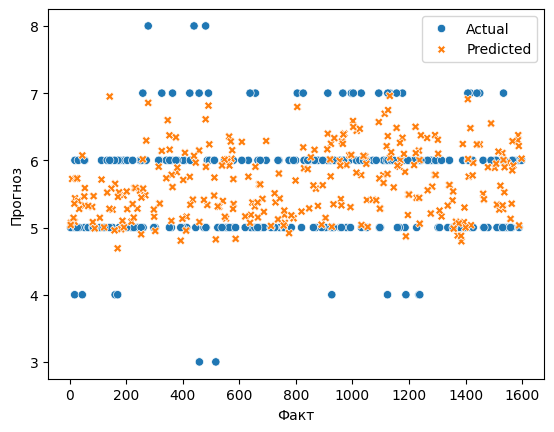

In [1092]:
sns.scatterplot(df_results)
plt.xlabel('Факт')
plt.ylabel('Прогноз')
plt.show()

### 1.3.*

Вариант 6

In [1093]:
x_data = np.array([4.0, 4.2, 4.4, 4.6, 4.8, 5.0])
y_data = np.array([4.0, 3.0, 6.0, 6.0, 4.0, 4.0])

In [1094]:
def func_linear(x, a, b):
    return a*x + b

def func_quadratic(x, a, b, c):
    return a*x**2 + b*x + c

In [1095]:
popt1, pcov1 = curve_fit(func_linear, x_data, y_data)
a, b = popt1

In [1096]:
popt2, pcov2 = curve_fit(func_quadratic, x_data, y_data)
a, b, c = popt2

In [1097]:
x_fit = np.linspace(min(x_data), max(x_data), 100)

In [1098]:
y_fit1 = func_linear(x_fit, a, b)
y_fit2 = func_quadratic(x_fit, a, b, c)

In [1099]:
print("Коэффициенты полинома первой степени:")
print(f"a = {a:.2f}, b = {b:.2f}")
print("Коэффициенты полинома второй степени:")
print(f"a = {a:.2f}, b = {b:.2f}, c = {c:.2f}")

Коэффициенты полинома первой степени:
a = -6.70, b = 60.70
Коэффициенты полинома второй степени:
a = -6.70, b = 60.70, c = -132.25


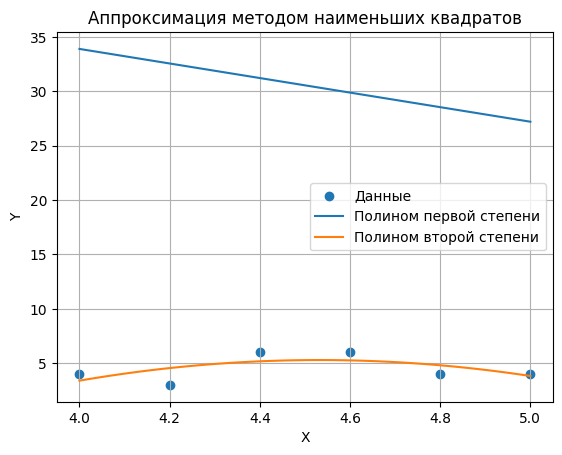

In [1100]:
plt.scatter(x_data, y_data, label='Данные')
plt.plot(x_fit, y_fit1, label='Полином первой степени')
plt.plot(x_fit, y_fit2, label='Полином второй степени')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Аппроксимация методом наименьших квадратов')
plt.grid(True)
plt.show()

=> зависимость в данных крайне далека от линейной